In [88]:
# import necessary libraries and set up environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

df = pd.read_csv("../data/MachineLearningRating_v3.txt", sep="|", low_memory=False)

rows, cols = df.shape
print("Total Rows:", rows, "Total Columns:", cols)
display(df.head())
display(df.columns.tolist())

df.columns = df.columns.str.strip()


Total Rows: 1000098 Total Columns: 52


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


['UnderwrittenCoverID',
 'PolicyID',
 'TransactionMonth',
 'IsVATRegistered',
 'Citizenship',
 'LegalType',
 'Title',
 'Language',
 'Bank',
 'AccountType',
 'MaritalStatus',
 'Gender',
 'Country',
 'Province',
 'PostalCode',
 'MainCrestaZone',
 'SubCrestaZone',
 'ItemType',
 'mmcode',
 'VehicleType',
 'RegistrationYear',
 'make',
 'Model',
 'Cylinders',
 'cubiccapacity',
 'kilowatts',
 'bodytype',
 'NumberOfDoors',
 'VehicleIntroDate',
 'CustomValueEstimate',
 'AlarmImmobiliser',
 'TrackingDevice',
 'CapitalOutstanding',
 'NewVehicle',
 'WrittenOff',
 'Rebuilt',
 'Converted',
 'CrossBorder',
 'NumberOfVehiclesInFleet',
 'SumInsured',
 'TermFrequency',
 'CalculatedPremiumPerTerm',
 'ExcessSelected',
 'CoverCategory',
 'CoverType',
 'CoverGroup',
 'Section',
 'Product',
 'StatutoryClass',
 'StatutoryRiskType',
 'TotalPremium',
 'TotalClaims']

In [89]:
# Basic information about the dataset
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")
df.dtypes 
df.info() 

The dataset contains 1000098 rows and 52 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 

In [90]:
# Exploratory Data Analysis (EDA)
df.info()
df.describe(include='all')
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [ ]:
# Check for duplicate rows
df.duplicated().sum()
df['TotalPremium'] = df['TotalPremium'].fillna(0)
df['TotalClaims'] = df['TotalClaims'].fillna(0)
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium'].replace(0, np.nan)

In [ ]:
# If TransactionMonth exists, parse to datetime
date_cols = [c for c in df.columns if 'transaction' in c.lower() or 'date' in c.lower() or 'month' in c.lower()]
print("Found possible date columns:", date_cols)

if 'TransactionMonth' in df.columns:
    df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
else:
    if date_cols:
        df[date_cols[0]] = pd.to_datetime(df[date_cols[0]], errors='coerce')
        df.rename(columns={date_cols[0]: 'TransactionMonth'}, inplace=True)
    else:
        print("No obvious date column found. If you have a date, rename it to TransactionMonth.")

Found possible date columns: ['TransactionMonth', 'VehicleIntroDate']


In [ ]:
# dtypes and missing
display(df.dtypes)
display(df.isna().sum().sort_values(ascending=False).head(30))

# percentage missing
miss_pct = (df.isna().sum() / len(df)) * 100
display(miss_pct.sort_values(ascending=False).head(30))

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

NumberOfVehiclesInFleet     1000098
CrossBorder                  999400
CustomValueEstimate          779642
Converted                    641901
Rebuilt                      641901
WrittenOff                   641901
LossRatio                    381634
NewVehicle                   153295
Bank                         145961
AccountType                   40232
Gender                         9536
MaritalStatus                  8259
make                            552
VehicleIntroDate                552
NumberOfDoors                   552
kilowatts                       552
cubiccapacity                   552
Cylinders                       552
Model                           552
bodytype                        552
mmcode                          552
VehicleType                     552
CapitalOutstanding                2
RegistrationYear                  0
CoverType                         0
TermFrequency                     0
CalculatedPremiumPerTerm          0
ExcessSelected              

NumberOfVehiclesInFleet     100.000000
CrossBorder                  99.930207
CustomValueEstimate          77.956560
Converted                    64.183810
Rebuilt                      64.183810
WrittenOff                   64.183810
LossRatio                    38.159660
NewVehicle                   15.327998
Bank                         14.594670
AccountType                   4.022806
Gender                        0.953507
MaritalStatus                 0.825819
make                          0.055195
VehicleIntroDate              0.055195
NumberOfDoors                 0.055195
kilowatts                     0.055195
cubiccapacity                 0.055195
Cylinders                     0.055195
Model                         0.055195
bodytype                      0.055195
mmcode                        0.055195
VehicleType                   0.055195
CapitalOutstanding            0.000200
RegistrationYear              0.000000
CoverType                     0.000000
TermFrequency            

In [ ]:
# Basic numeric summary
num_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'SumInsured', 'CalculatedPremiumPerTerm', 'CapitalOutstanding']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
        
display(df[num_cols].describe().T)

for c in num_cols:
    if c in df.columns:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        print(f"{c}: mean={df[c].mean():,.2f}, median={df[c].median():,.2f}, std={df[c].std():,.2f}, IQR={iqr:,.2f}")

,count,mean,std,min,25%,50%,75%,max
TotalPremium,1000098.0,61.905496,2.302845e+02,-782.576754,0.0000,2.178333,21.929825,6.528260e+04
TotalClaims,1000098.0,64.861190,2.384075e+03,-12002.412281,0.0000,0.000000,0.000000,3.930921e+05
CustomValueEstimate,220456.0,225531.129942,5.645157e+05,20000.000000,135000.0000,220000.000000,280000.000000,2.655000e+07
SumInsured,1000098.0,604172.732589,1.508332e+06,0.010000,5000.0000,7500.000000,250000.000000,1.263620e+07
CalculatedPremiumPerTerm,1000098.0,117.875691,3.997017e+02,0.000000,3.2248,8.436900,90.000000,7.442217e+04
CapitalOutstanding,999776.0,52605.220796,1.114172e+05,-2.000000,0.0000,0.000000,0.000000,7.000000e+05


TotalPremium: mean=61.91, median=2.18, std=230.28, IQR=21.93
TotalClaims: mean=64.86, median=0.00, std=2,384.07, IQR=0.00
CustomValueEstimate: mean=225,531.13, median=220,000.00, std=564,515.75, IQR=145,000.00
SumInsured: mean=604,172.73, median=7,500.00, std=1,508,331.84, IQR=245,000.00
CalculatedPremiumPerTerm: mean=117.88, median=8.44, std=399.70, IQR=86.78
CapitalOutstanding: mean=52,605.22, median=0.00, std=111,417.19, IQR=0.00


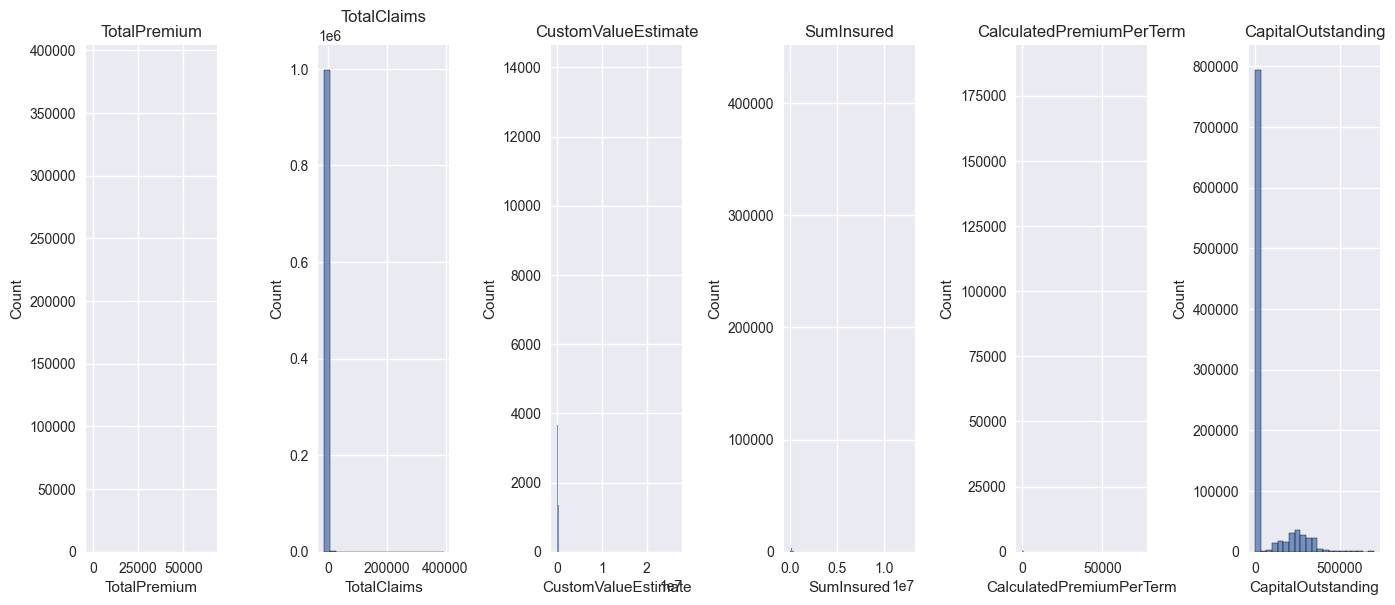

In [ ]:
# Visualizations - Histograms for numeric columns
plt.figure(figsize=(14,6))
for i,c in enumerate([c for c in num_cols if c in df.columns]):
    plt.subplot(1, len([c for c in num_cols if c in df.columns]), i+1)
    sns.histplot(df[c].dropna(), kde=False)
    plt.title(c)
plt.tight_layout()

c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


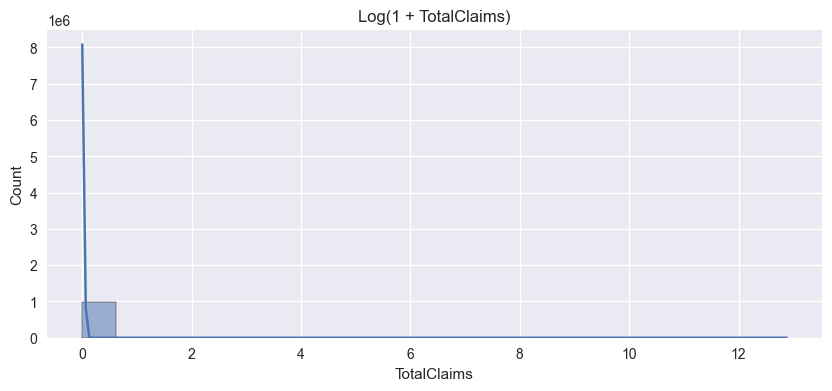

In [ ]:
# Log-transform TotalClaims if it exists
if 'TotalClaims' in df.columns:
    plt.figure(figsize=(10,4))
    sns.histplot(np.log1p(df['TotalClaims'].dropna()), kde=True)
    plt.title('Log(1 + TotalClaims)')
    plt.show()

In [ ]:
# create loss ratio column (handle divide by zero)
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)

overall_loss_ratio = df['TotalClaims'].sum() / df['TotalPremium'].sum()
print("Overall portfolio Loss Ratio (aggregate):", overall_loss_ratio)

group_cols = [c for c in ['Province','VehicleType','Gender'] if c in df.columns]
for g in group_cols:
    agg = df.groupby(g).agg(total_claims=('TotalClaims','sum'), total_prem=('TotalPremium','sum'))
    agg['loss_ratio'] = agg['total_claims'] / agg['total_prem']
    agg = agg.sort_values('loss_ratio', ascending=False)
    print("\nLoss ratio by", g)
    display(agg.head(10))


Overall portfolio Loss Ratio (aggregate): 1.0477452570332202

Loss ratio by Province


,total_claims,total_prem,loss_ratio
Province,,,
Gauteng,2.939415e+07,2.405377e+07,1.222018
KwaZulu-Natal,1.430138e+07,1.320908e+07,1.082693
Western Cape,1.038977e+07,9.806559e+06,1.059472
North West,5.920250e+06,7.490508e+06,0.790367
Mpumalanga,2.044675e+06,2.836292e+06,0.720897
Free State,3.549223e+05,5.213632e+05,0.680758
Limpopo,1.016477e+06,1.537324e+06,0.661199
Eastern Cape,1.356427e+06,2.140104e+06,0.633813
Northern Cape,8.949051e+04,3.165581e+05,0.282699



Loss ratio by VehicleType


,total_claims,total_prem,loss_ratio
VehicleType,,,
Heavy Commercial,7.504746e+05,4.609479e+05,1.628112
Medium Commercial,4.119867e+06,3.922746e+06,1.050251
Passenger Vehicle,5.937207e+07,5.664202e+07,1.048198
Light Commercial,6.045250e+04,2.604975e+05,0.232066
Bus,7.996535e+03,5.824474e+04,0.137292



Loss ratio by Gender


,total_claims,total_prem,loss_ratio
Gender,,,
Not specified,6.271410e+07,5.920275e+07,1.059311
Male,1.396704e+06,1.580143e+06,0.883910
Female,2.502461e+05,3.044806e+05,0.821879


,TransactionMonthPeriod,total_claims,total_prem,policy_count,loss_ratio
0,2013-10,0.000000e+00,3.710635e+02,5,0.000000
1,2013-11,5.058508e+04,2.130747e+04,78,2.374054
2,2013-12,9.283386e+03,4.248475e+04,100,0.218511
3,2014-01,1.243686e+04,5.408520e+04,126,0.229949
4,2014-02,6.298931e+04,6.078844e+04,148,1.036205
5,2014-03,3.227850e+05,9.857719e+04,264,3.274439
6,2014-04,3.068636e+05,2.342743e+05,474,1.309847
7,2014-05,5.180427e+05,3.759117e+05,659,1.378097
8,2014-06,5.045364e+05,4.862194e+05,826,1.037672
9,2014-07,4.289822e+05,6.092661e+05,1036,0.704097


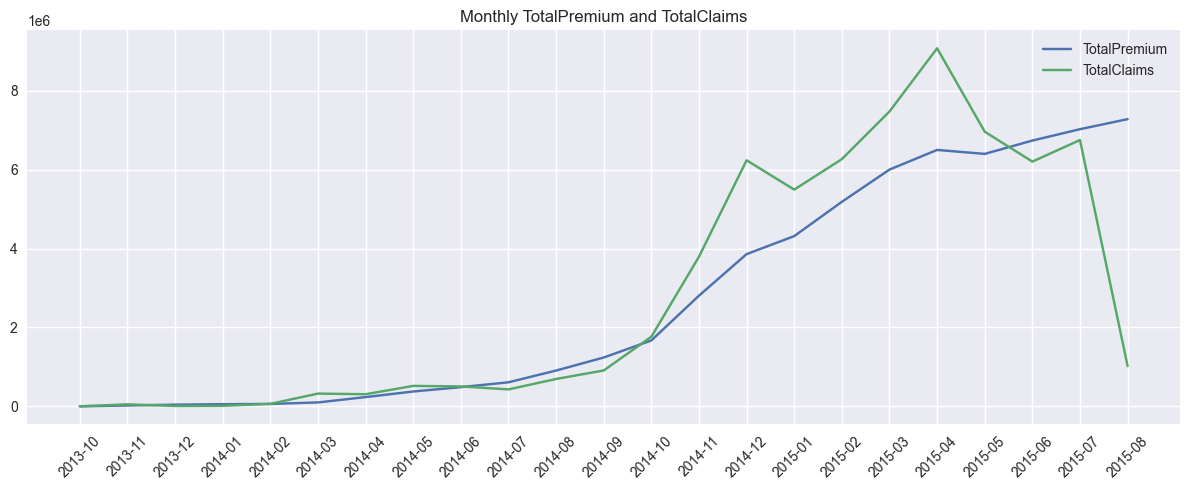

In [ ]:
# ensure TransactionMonth is period/month granularity
if 'TransactionMonth' in df.columns:
    df['TransactionMonthPeriod'] = pd.to_datetime(df['TransactionMonth']).dt.to_period('M')
    monthly = df.groupby('TransactionMonthPeriod').agg(
        total_claims=('TotalClaims','sum'),
        total_prem=('TotalPremium','sum'),
        policy_count=('PolicyID','nunique') if 'PolicyID' in df.columns else ('TotalPremium','count')
    ).reset_index()
    monthly['loss_ratio'] = monthly['total_claims'] / monthly['total_prem']
    display(monthly.head(20))

    # plot
    plt.figure(figsize=(12,5))
    plt.plot(monthly['TransactionMonthPeriod'].astype(str), monthly['total_prem'], label='TotalPremium')
    plt.plot(monthly['TransactionMonthPeriod'].astype(str), monthly['total_claims'], label='TotalClaims')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title('Monthly TotalPremium and TotalClaims')
    plt.tight_layout()
    plt.show()

In [ ]:
# top makes and models
if 'make' in df.columns and 'Model' in df.columns:
    top_makes = df.groupby('make').agg(total_claims=('TotalClaims','sum'), avg_claim=('TotalClaims','mean'), count=('TotalClaims','count'))
    top_makes = top_makes[top_makes['count']>50]
    top_makes = top_makes.sort_values('total_claims', ascending=False)
    display(top_makes.head(20))

    # top models (make+model)
    df['make_model'] = df['make'].astype(str) + ' - ' + df['Model'].astype(str)
    top_models = df.groupby('make_model').agg(total_claims=('TotalClaims','sum'), avg_claim=('TotalClaims','mean'), count=('TotalClaims','count'))
    top_models = top_models[top_models['count']>20].sort_values('avg_claim', ascending=False)
    display(top_models.head(20))
    plt.show()

,total_claims,avg_claim,count
make,,,
TOYOTA,5.174611e+07,63.626435,813280
MERCEDES-BENZ,2.938695e+06,70.069035,41940
VOLKSWAGEN,1.839180e+06,87.877091,20929
CMC,1.323616e+06,61.210485,21624
GOLDEN JOURNEY,1.246583e+06,86.197105,14462
AUDI,1.021004e+06,137.843083,7407
IVECO,7.558930e+05,89.667017,8430
C.A.M,6.957082e+05,43.021964,16171
BMW,4.814972e+05,90.558050,5317


,total_claims,avg_claim,count
make_model,,,
TOYOTA - L/CRUISER FJ 4.0 V6 CRUISER,384549.859649,5340.970273,72
HYUNDAI - H-1 2.5 CRDI WAGON A/T,444763.552632,4118.181043,108
FIAT - DUCATO 2.3 JTD VETRATO,100453.421053,1014.681021,99
nan - nan,556685.974912,1008.489085,552
VOLKSWAGEN - POLO VIVO 1.6 5Dr,66204.710526,827.558882,80
MERCEDES-BENZ - C180 BE COUPE,291435.938596,743.459027,392
MERCEDES-BENZ - SPRINTER 312D F/C P/V,43859.649123,664.540138,66
SUZUKI - ERTIGA 1.4 GA,171210.894737,631.774519,271
TOYOTA - YARIS T1 3Dr,29698.552632,618.719846,48


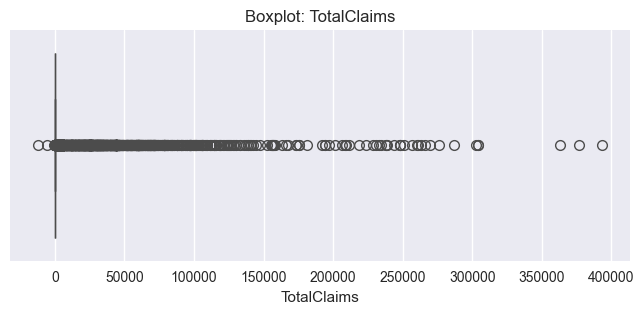

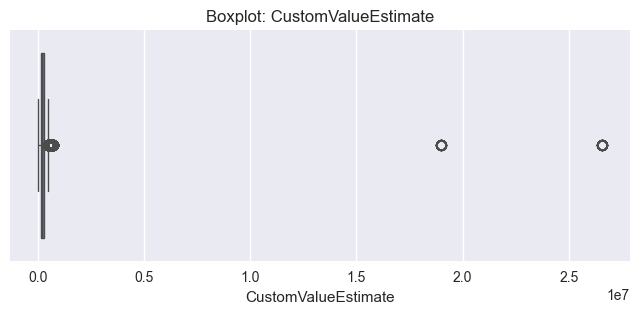

{'TotalClaims': {'lower': 0.0, 'upper': 0.0, 'outlier_count': 2793},
 'CustomValueEstimate': {'lower': -82500.0,
  'upper': 497500.0,
  'outlier_count': 1785},
 'TotalPremium': {'lower': -32.8947368421045,
  'upper': 54.8245614035075,
  'outlier_count': 209042}}

In [ ]:
# boxplot for TotalClaims and CustomValueEstimate
for c in ['TotalClaims','CustomValueEstimate']:
    if c in df.columns:
        plt.figure(figsize=(8,3))
        sns.boxplot(x=df[c].dropna())
        plt.title(f'Boxplot: {c}')
        plt.show()

outlier_info = {}
for c in ['TotalClaims','CustomValueEstimate','TotalPremium']:
    if c in df.columns:
        q1 = df[c].quantile(0.25); q3 = df[c].quantile(0.75); iqr = q3 - q1
        lower = q1 - 1.5*iqr; upper = q3 + 1.5*iqr
        outlier_count = df[(df[c] < lower) | (df[c] > upper)].shape[0]
        outlier_info[c] = {'lower': lower, 'upper': upper, 'outlier_count': outlier_count}
display(outlier_info)

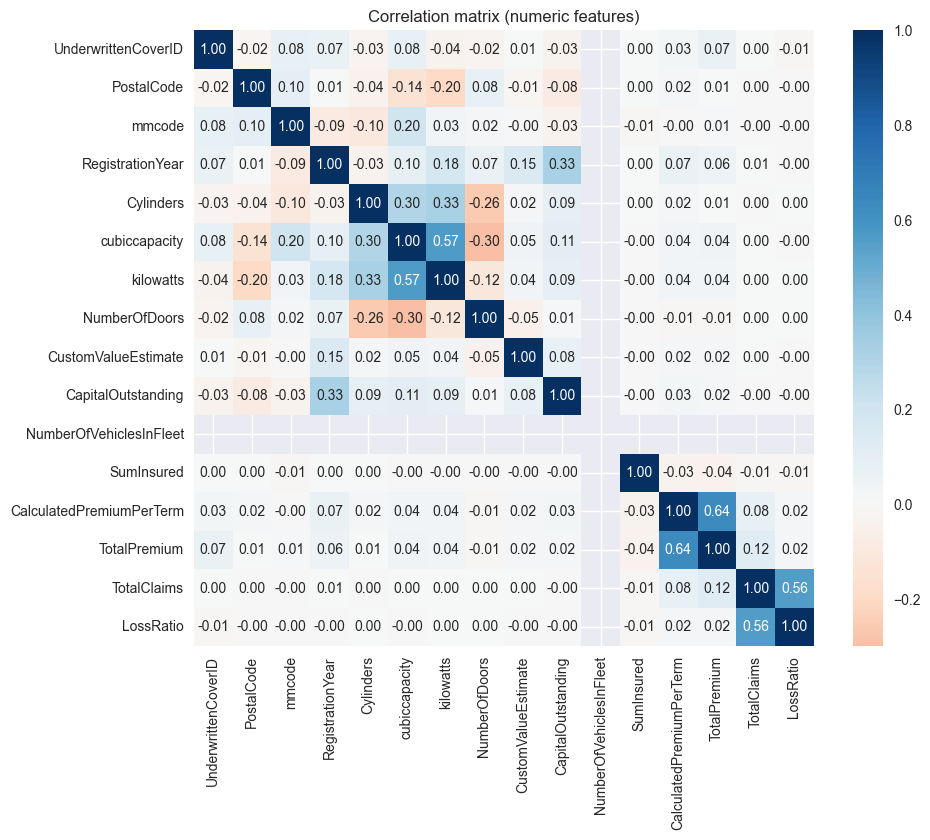

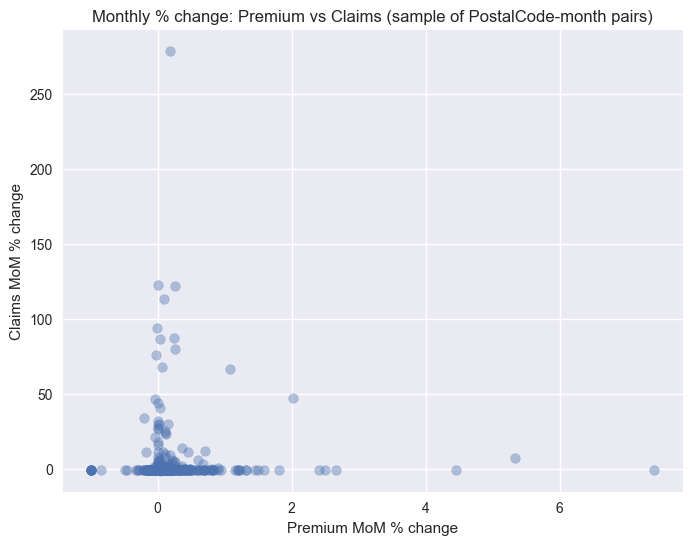

In [ ]:
# correlation for numeric columns
num_for_corr = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['PolicyID']]
corr = df[num_for_corr].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title('Correlation matrix (numeric features)')
plt.show()

if 'PostalCode' in df.columns and 'TransactionMonthPeriod' in df.columns:
    zip_month = df.groupby(['PostalCode','TransactionMonthPeriod']).agg(total_prem=('TotalPremium','sum'), total_claims=('TotalClaims','sum')).reset_index()
    zip_month['total_prem_pct_change'] = zip_month.groupby('PostalCode')['total_prem'].pct_change()
    zip_month['total_claims_pct_change'] = zip_month.groupby('PostalCode')['total_claims'].pct_change()

    plt.figure(figsize=(8,6))
    sample = zip_month.dropna().sample(n=min(1000, len(zip_month.dropna())))  
    plt.scatter(sample['total_prem_pct_change'], sample['total_claims_pct_change'], alpha=0.4)
    plt.xlabel('Premium MoM % change')
    plt.ylabel('Claims MoM % change')
    plt.title('Monthly % change: Premium vs Claims (sample of PostalCode-month pairs)')
    plt.show()

In [ ]:
# ANOVA test for LossRatio by Province
if 'Province' in df.columns:
    subset = df[['Province','LossRatio']].dropna()
    groups = [g['LossRatio'].values for n,g in subset.groupby('Province')]
    f_stat, pval = stats.f_oneway(*groups)
    print("ANOVA F-stat:", f_stat, "p-value:", pval)

ANOVA F-stat: 4.988778295471582 p-value: 3.3310233679703755e-06


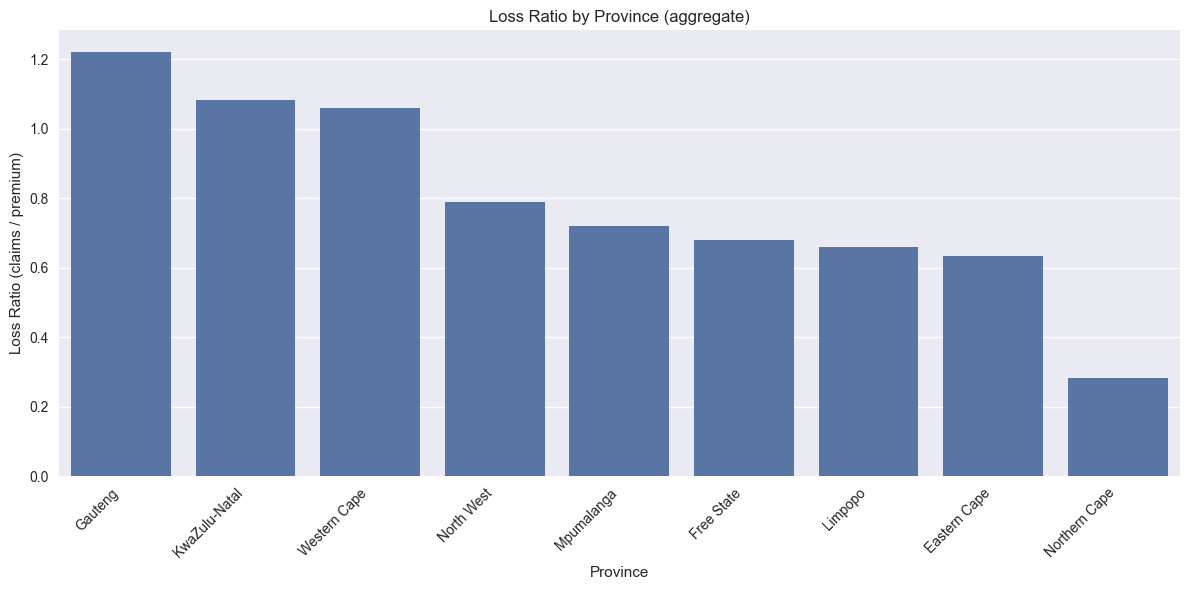

In [ ]:
# Loss ratio by Province plot
if 'Province' in df.columns:
    prov = df.groupby('Province').agg(total_claims=('TotalClaims','sum'), total_prem=('TotalPremium','sum'))
    prov['loss_ratio'] = prov['total_claims'] / prov['total_prem']
    prov = prov.sort_values('loss_ratio', ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(x=prov.index, y=prov['loss_ratio'])
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Loss Ratio (claims / premium)')
    plt.title('Loss Ratio by Province (aggregate)')
    plt.tight_layout()
    plt.show()

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_19204\3359280727.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly['TransactionMonthPeriod'].astype(str), rotation=45)


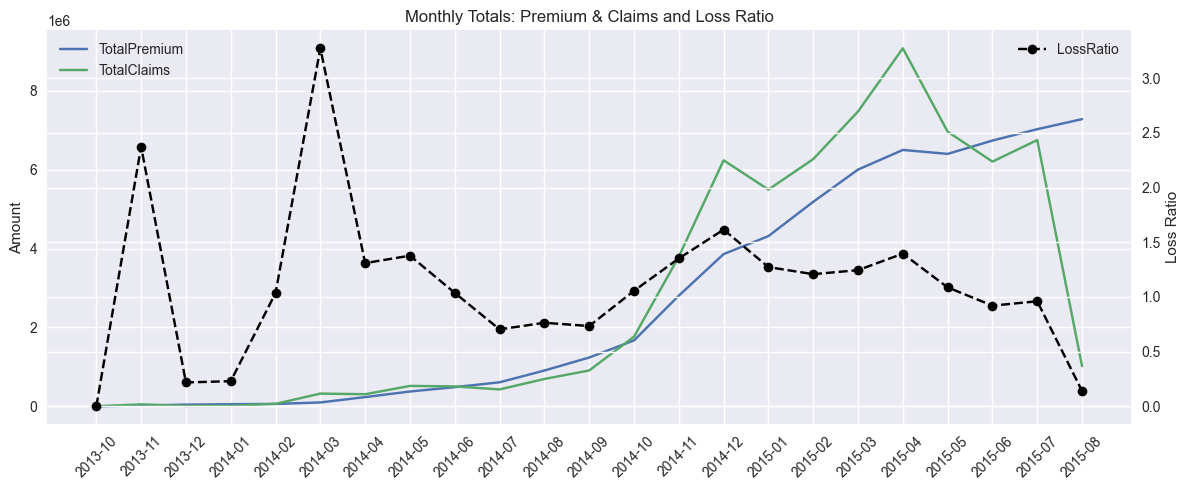

In [ ]:
# Monthly Loss Ratio plot
if 'TransactionMonthPeriod' in df.columns:
    monthly = df.groupby('TransactionMonthPeriod').agg(total_claims=('TotalClaims','sum'), total_prem=('TotalPremium','sum')).reset_index()
    monthly['loss_ratio'] = monthly['total_claims'] / monthly['total_prem']
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax1.plot(monthly['TransactionMonthPeriod'].astype(str), monthly['total_prem'], label='TotalPremium')
    ax1.plot(monthly['TransactionMonthPeriod'].astype(str), monthly['total_claims'], label='TotalClaims')
    ax1.set_xticklabels(monthly['TransactionMonthPeriod'].astype(str), rotation=45)
    ax1.set_ylabel('Amount')

    ax2 = ax1.twinx()
    ax2.plot(monthly['TransactionMonthPeriod'].astype(str), monthly['loss_ratio'], color='black', linestyle='--', marker='o', label='LossRatio')
    ax2.set_ylabel('Loss Ratio')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')
    plt.title('Monthly Totals: Premium & Claims and Loss Ratio')
    plt.tight_layout()
    plt.show()

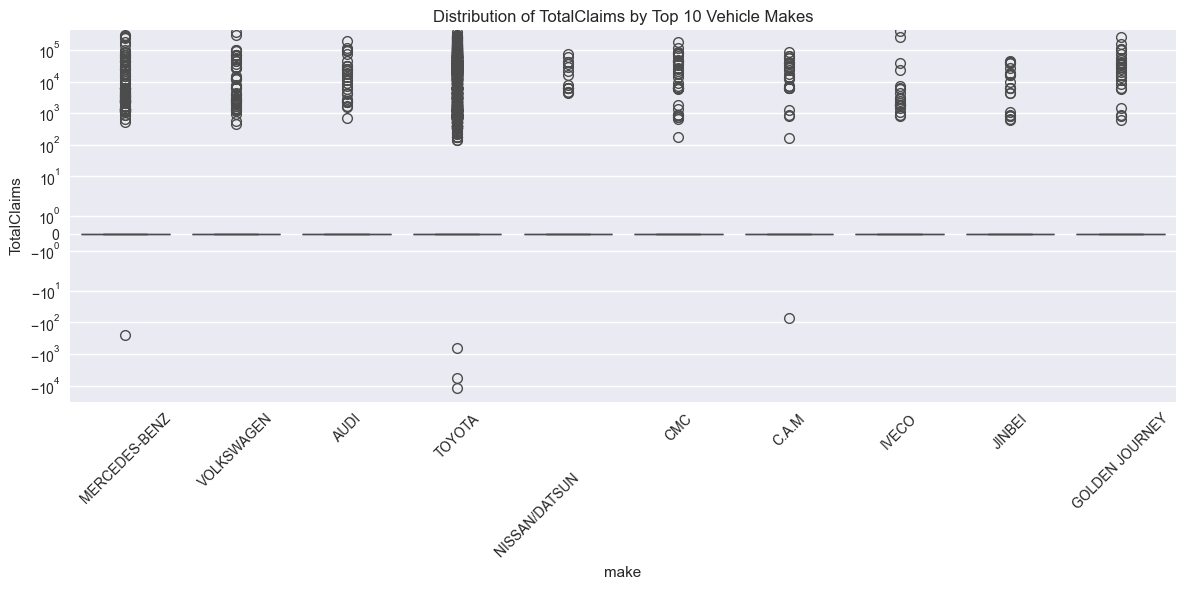

In [ ]:
# TotalClaims distribution by top 10 vehicle makes
if 'make' in df.columns:
    top10 = df['make'].value_counts().nlargest(10).index
    plt.figure(figsize=(12,6))
    sns.boxplot(x='make', y='TotalClaims', data=df[df['make'].isin(top10)])
    plt.yscale('symlog') 
    plt.xticks(rotation=45)
    plt.title('Distribution of TotalClaims by Top 10 Vehicle Makes')
    plt.tight_layout()
    plt.show()

,total_claims,total_premium,loss_ratio
PostalCode,,,
2000,9.329457e+06,8.246529e+06,1.131319
122,3.814025e+06,2.689986e+06,1.417861
7784,1.757833e+06,1.372757e+06,1.280512
8000,1.717952e+06,1.528819e+06,1.123712
2196,1.628089e+06,1.392313e+06,1.169341
1863,1.360297e+06,4.898557e+05,2.776935
4360,1.006885e+06,8.127869e+05,1.238805
4037,9.665351e+05,6.701952e+05,1.442170
302,9.461559e+05,4.091174e+05,2.312676


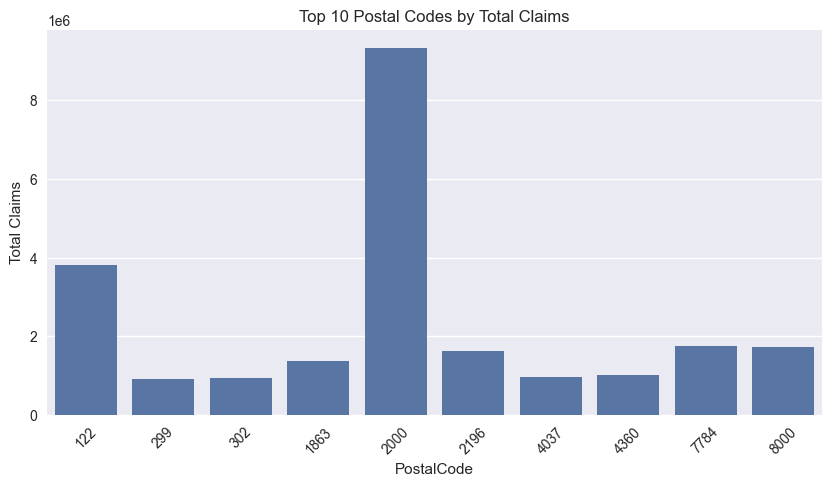

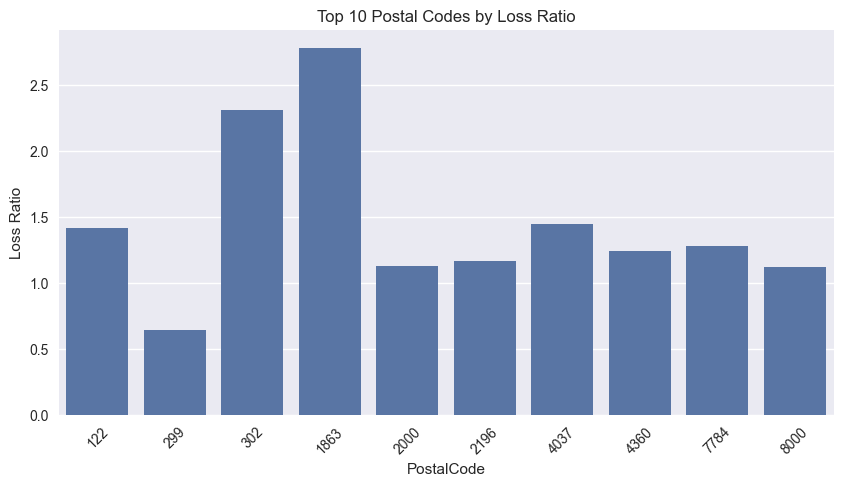

In [93]:
# Top PostalCodes by TotalClaims or LossRatio
if 'PostalCode' in df.columns:
    postal_agg = df.groupby('PostalCode').agg(
        total_claims=('TotalClaims','sum'),
        total_premium=('TotalPremium','sum')
    )
    postal_agg['loss_ratio'] = postal_agg['total_claims'] / postal_agg['total_premium']
    postal_agg = postal_agg.sort_values('total_claims', ascending=False)
    
    # Top 10 Postal Codes
    top_postal = postal_agg.head(10)
    display(top_postal)
    
    # Bar plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_postal.index, y='total_claims', data=top_postal)
    plt.xticks(rotation=45)
    plt.ylabel("Total Claims")
    plt.title("Top 10 Postal Codes by Total Claims")
    plt.show()
    
    # Loss ratio bar plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_postal.index, y='loss_ratio', data=top_postal)
    plt.xticks(rotation=45)
    plt.ylabel("Loss Ratio")
    plt.title("Top 10 Postal Codes by Loss Ratio")
    plt.show()


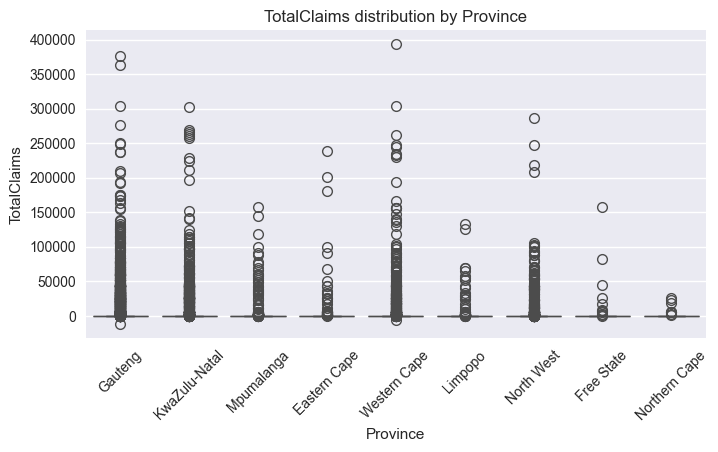

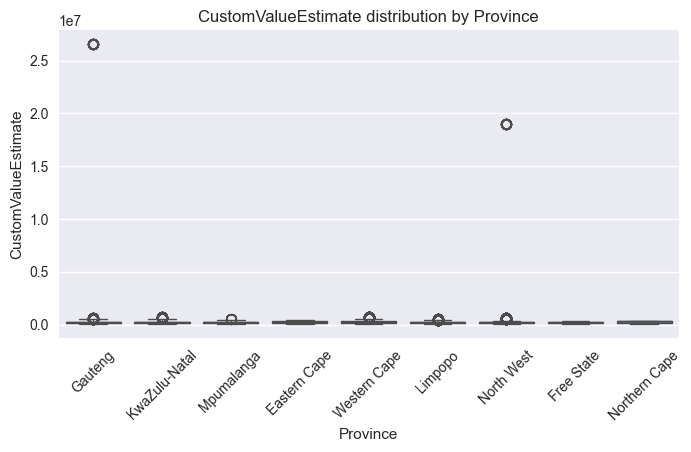

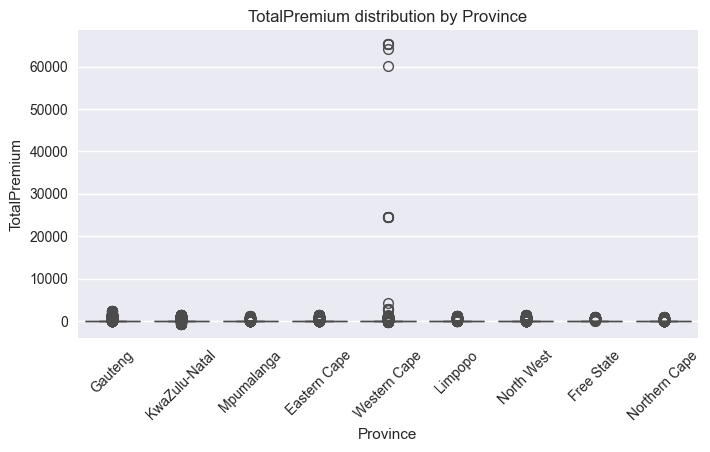

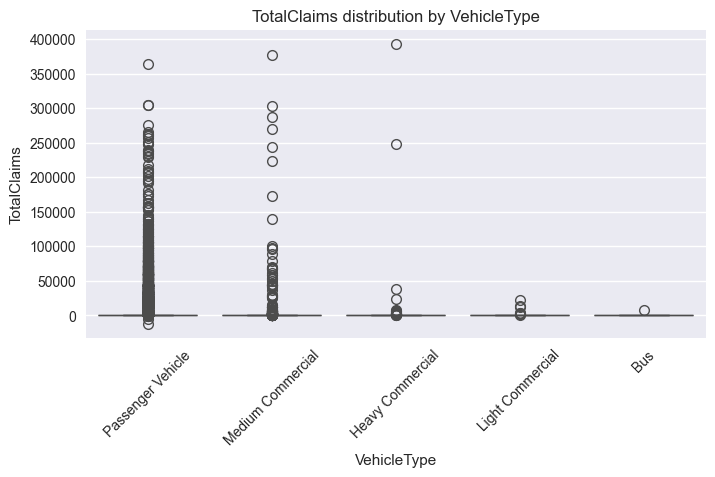

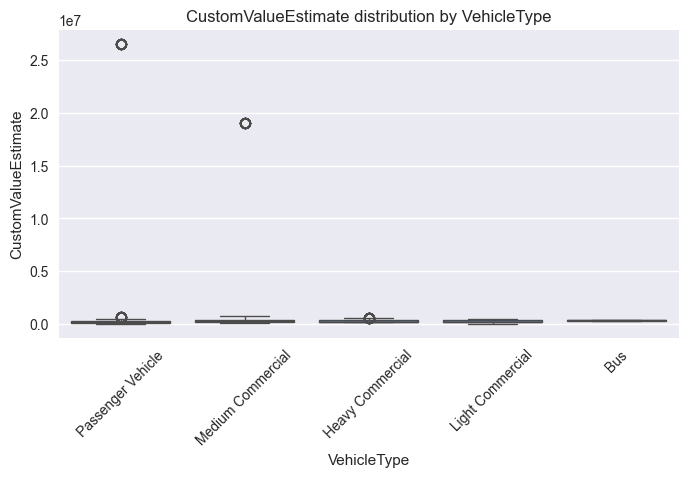

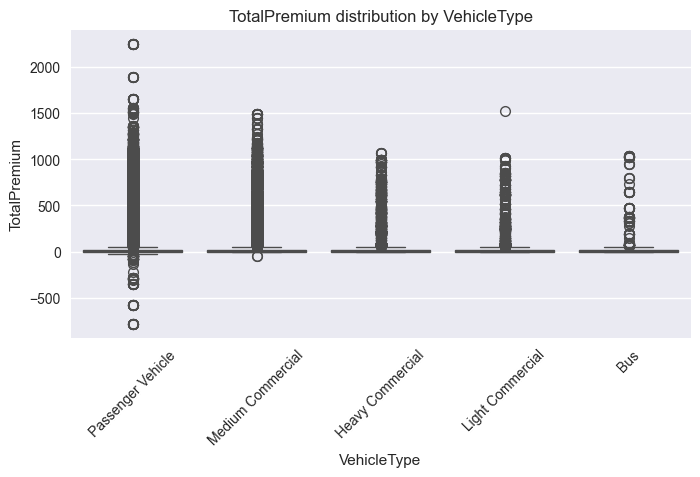

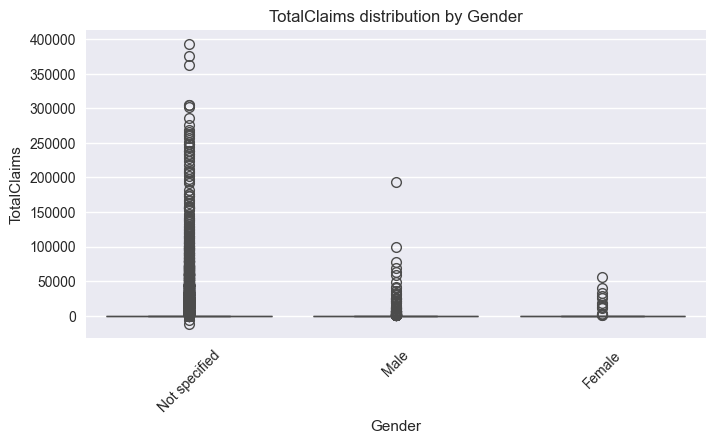

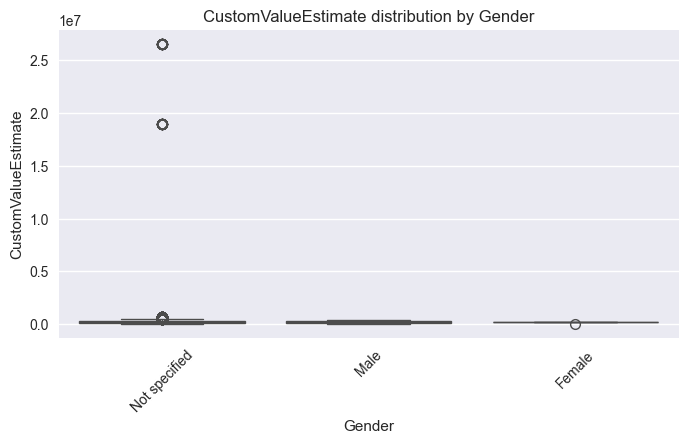

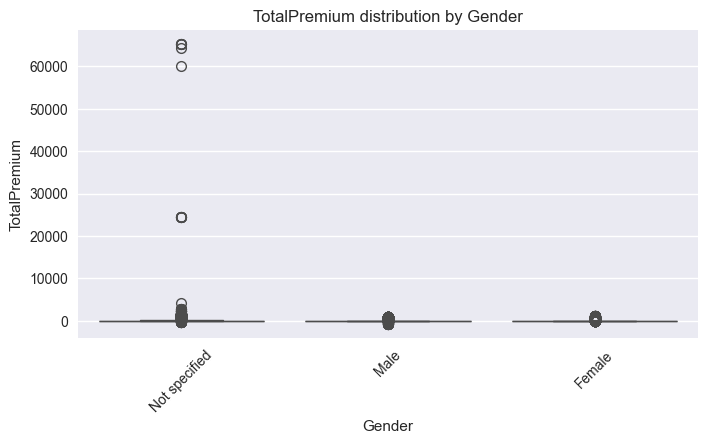

In [94]:
# Boxplots: numeric vs categorical
cat_cols = [c for c in ['Province','VehicleType','Gender'] if c in df.columns]
num_cols_for_box = ['TotalClaims','CustomValueEstimate','TotalPremium']

for cat in cat_cols:
    for num in num_cols_for_box:
        plt.figure(figsize=(8,4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.xticks(rotation=45)
        plt.title(f'{num} distribution by {cat}')
        plt.show()


TotalClaims outliers flagged: 2793
CustomValueEstimate outliers flagged: 1785
TotalPremium outliers flagged: 209042


c:\Users\HP EliteBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


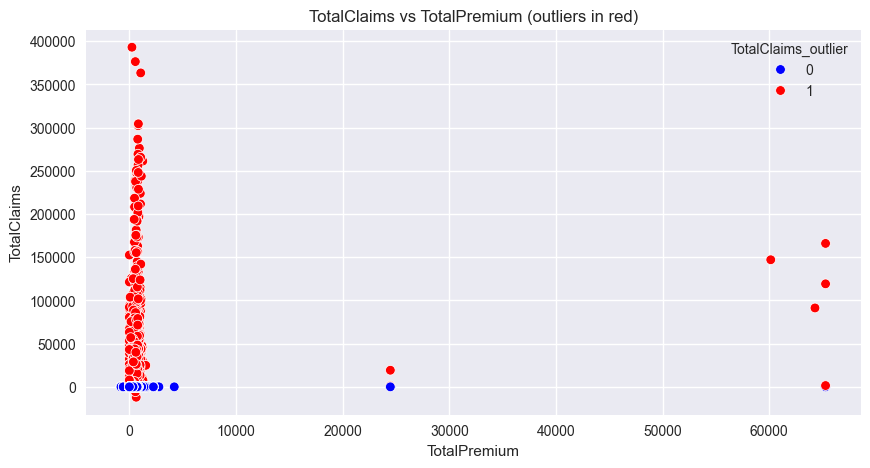

In [95]:
# Flag extreme outliers
for c in num_cols_for_box:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df[f'{c}_outlier'] = df[c].apply(lambda x: 1 if x < lower or x > upper else 0)
    print(f"{c} outliers flagged: {df[f'{c}_outlier'].sum()}")

# Plot with outliers highlighted
plt.figure(figsize=(10,5))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='TotalClaims_outlier', data=df, palette={0:'blue',1:'red'})
plt.title('TotalClaims vs TotalPremium (outliers in red)')
plt.show()


In [96]:
# Aggregate by VehicleType / Gender
if 'VehicleType' in df.columns and 'Gender' in df.columns:
    summary = df.groupby(['VehicleType','Gender']).agg(
        total_claims=('TotalClaims','sum'),
        total_premium=('TotalPremium','sum'),
        avg_loss_ratio=('LossRatio','mean'),
        count=('TotalClaims','count')
    ).sort_values('avg_loss_ratio', ascending=False)
    display(summary.head(10))

total_claims  total_premium  avg_loss_ratio  \
VehicleType       Gender                                                       
Medium Commercial Male           1.774006e+04   8.240018e+04        0.895023   
Heavy Commercial  Not specified  7.504746e+05   4.609040e+05        0.793803   
Light Commercial  Not specified  6.045250e+04   2.604975e+05        0.543917   
Passenger Vehicle Female         2.375931e+05   2.839411e+05        0.510259   
Medium Commercial Not specified  4.089474e+06   3.819806e+06        0.486329   
Passenger Vehicle Not specified  5.724902e+07   5.403619e+07        0.335284   
                  Male           1.378964e+06   1.497699e+06        0.327793   
Medium Commercial Female         1.265298e+04   2.053948e+04        0.108812   
Bus               Not specified  7.996535e+03   5.824474e+04        0.000000   
Heavy Commercial  Male           0.000000e+00   4.385965e+01        0.000000   

                                  count  
VehicleType       Gender                 
Medium Commercial Male             2314  
Heavy Commercial  Not specified    7292  
Light Commercial  Not specified    3897  
Passenger Vehicle Female           6576  
Medium Commercial Not specified   51492  
Passenger Vehicle Not specified  877092  
                  Male            40394  
Medium Commercial Female            179  
Bus               Not specified     665  
Heavy Commercial  Male              109

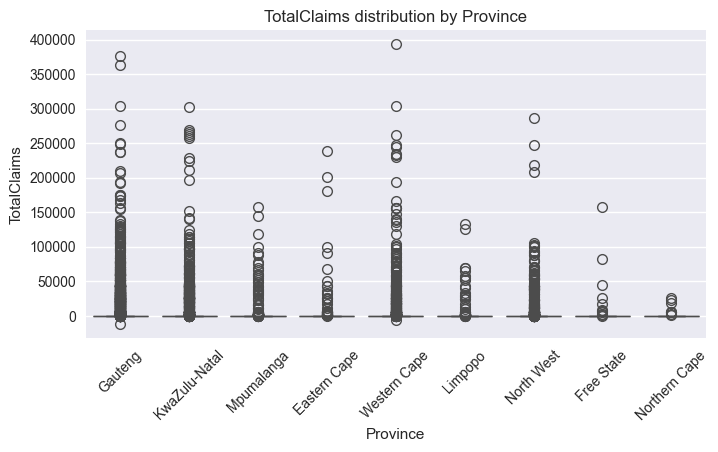

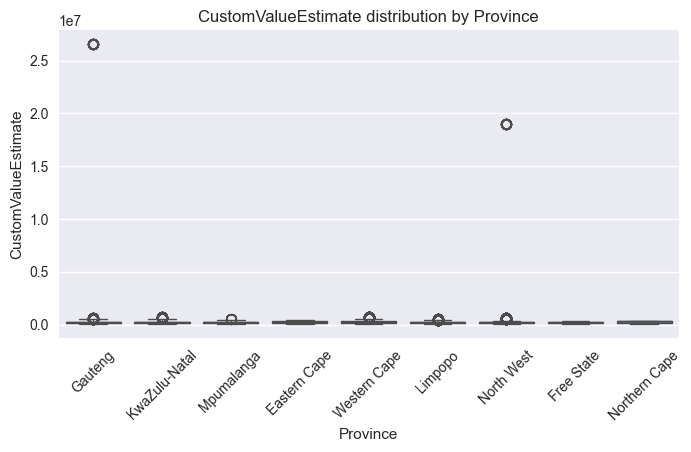

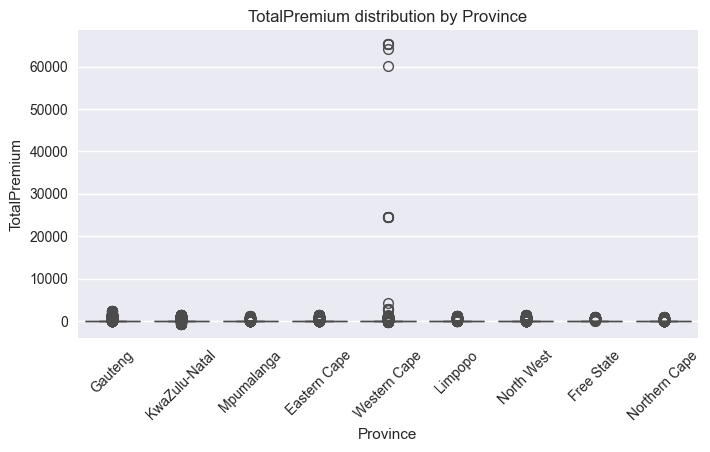

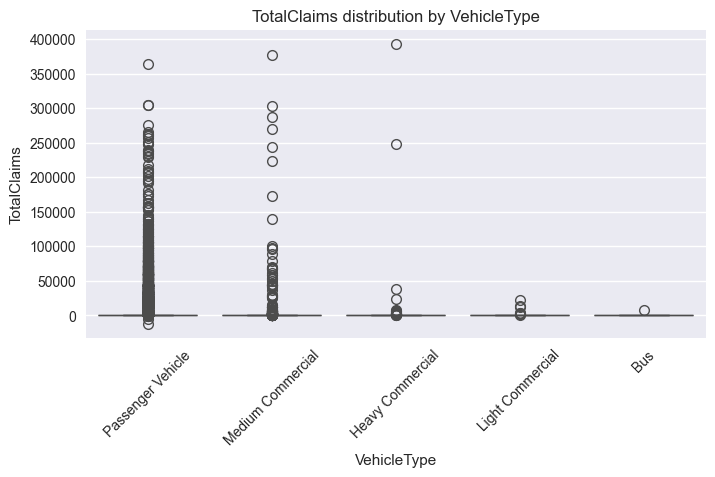

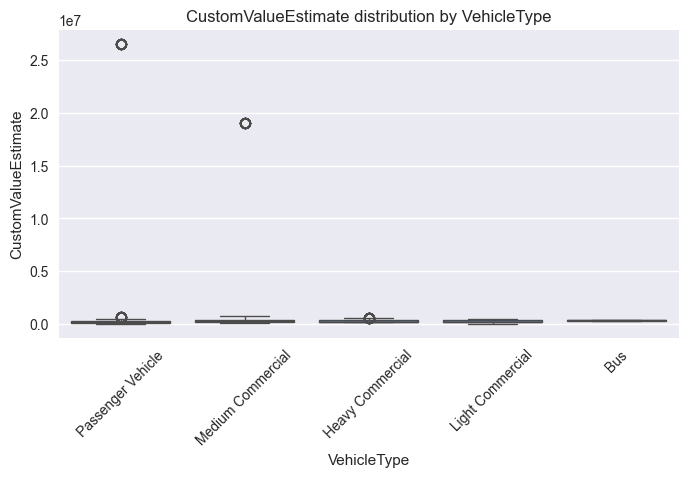

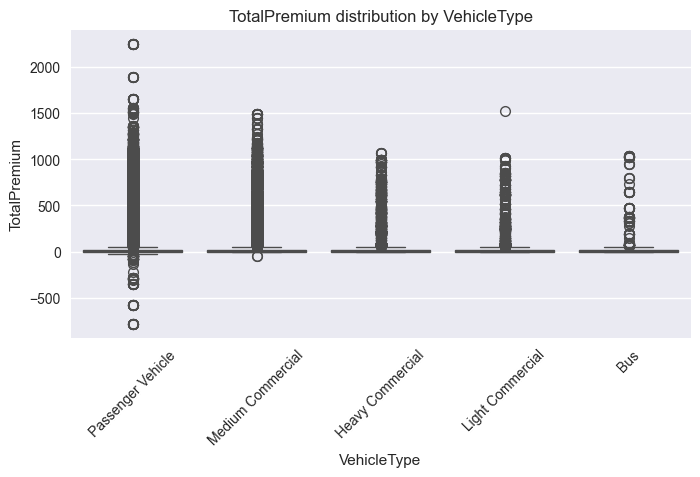

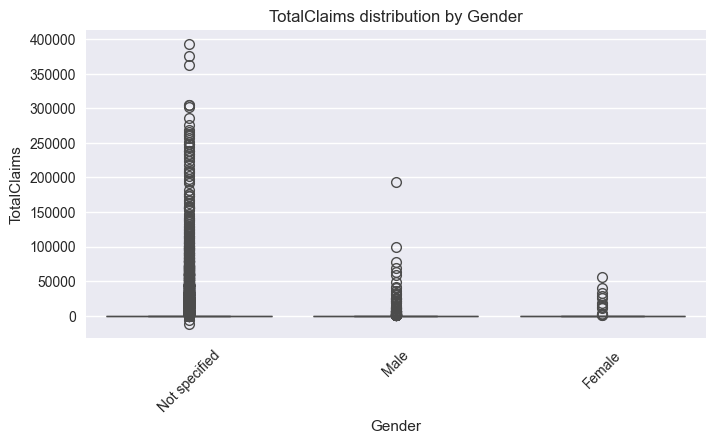

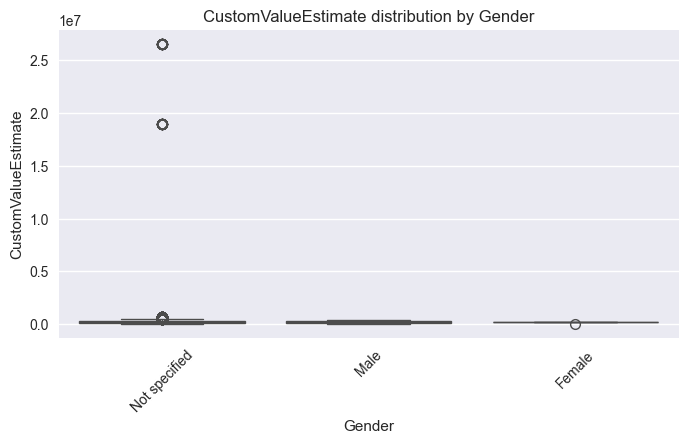

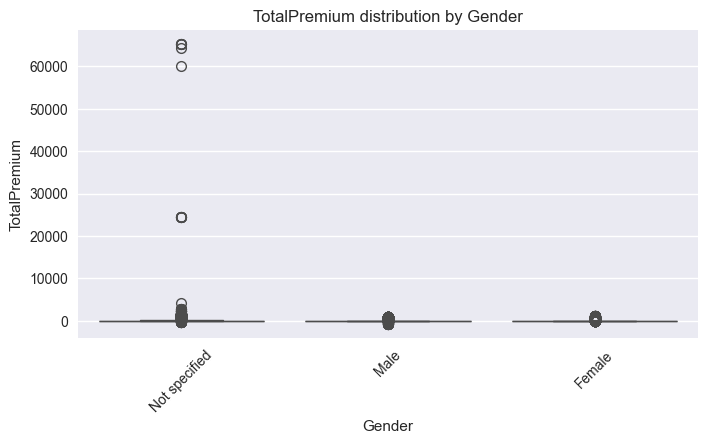

In [97]:
def boxplot_numeric_by_category(df, num_cols, cat_cols):
    for cat in cat_cols:
        for num in num_cols:
            plt.figure(figsize=(8,4))
            sns.boxplot(x=cat, y=num, data=df)
            plt.xticks(rotation=45)
            plt.title(f'{num} distribution by {cat}')
            plt.show()
            
# Example usage
boxplot_numeric_by_category(df, num_cols_for_box, cat_cols)

In [ ]:
# Combined Summary Visualization
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True, figsize=(16,10))
gs = gridspec.GridSpec(2, 2, figure=fig)

# 1 Loss Ratio by Province
if 'Province' in df.columns:
    prov = df.groupby('Province').agg(total_claims=('TotalClaims','sum'),
                                      total_prem=('TotalPremium','sum'))
    prov['loss_ratio'] = prov['total_claims'] / prov['total_prem']
    prov = prov.sort_values('loss_ratio', ascending=False)
    
    ax1 = fig.add_subplot(gs[0, 0])
    sns.barplot(x=prov.index, y='loss_ratio', data=prov, palette='magma', ax=ax1)
    ax1.set_title("Loss Ratio by Province")
    ax1.set_ylabel("Loss Ratio")
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# 2 TotalClaims by VehicleType
if 'VehicleType' in df.columns:
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(x='VehicleType', y='TotalClaims', data=df, palette='Set2', ax=ax2)
    ax2.set_title("TotalClaims by VehicleType")
    ax2.set_yscale('symlog')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# 3️ Extreme Outliers: TotalClaims vs TotalPremium
num_cols_for_box = ['TotalClaims','TotalPremium']
for c in num_cols_for_box:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    df[f'{c}_outlier'] = df[c].apply(lambda x: 1 if x < lower or x > upper else 0)

ax3 = fig.add_subplot(gs[1, :])
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='TotalClaims_outlier',
                data=df, palette={0:'blue',1:'red'}, alpha=0.6, ax=ax3)
ax3.set_title("TotalClaims vs TotalPremium (outliers in red)")
ax3.set_xlabel("TotalPremium")
ax3.set_ylabel("TotalClaims")
ax3.legend(title='Outlier', loc='upper right')

plt.suptitle("EDA Summary: Key Risk Insights", fontsize=18)
plt.show()


C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_19204\3605987866.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prov.index, y='loss_ratio', data=prov, palette='magma', ax=ax1)
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_19204\3605987866.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_19204\3605987866.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VehicleType', y='TotalClaims', data=df, palette='Set2', ax=ax2)
C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_19204\36059